<a href="https://colab.research.google.com/github/SameehanSahasrabudhe/CA2_ML2_DL/blob/main/Cats_vs_dogs_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 215MB/s]
100% 1.06G/1.06G [00:11<00:00, 100MB/s]


In [9]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode= 'int',
    labels='inferred',
    batch_size=32,
    image_size= (256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode='int',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2, # Use 20% of the data for validation
    subset='validation',
    seed=123 # Set a seed for reproducible split
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode= 'int',
    labels='inferred',
    batch_size=32,
    image_size= (256, 256),
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize

def process_image(image, labels):
  image = tf.cast(image/255, tf.float32)
  return image, labels

train_ds_norm = train_ds.map(process_image)
val_ds_norm = val_ds.map(process_image)
test_ds_norm = test_ds.map(process_image)

In [27]:
# Create a CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation='relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
history = model.fit(train_ds_norm, epochs = 10, validation_data=val_ds_norm)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.5675 - loss: 2.5452 - val_accuracy: 0.6165 - val_loss: 0.6462
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 74ms/step - accuracy: 0.6892 - loss: 0.5932 - val_accuracy: 0.6678 - val_loss: 0.6056
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7528 - loss: 0.5108 - val_accuracy: 0.7828 - val_loss: 0.4693
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.8042 - loss: 0.4281 - val_accuracy: 0.7950 - val_loss: 0.4791
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8269 - loss: 0.3813 - val_accuracy: 0.8615 - val_loss: 0.3302
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8633 - loss: 0.3202 - val_accuracy: 0.8692 - val_loss: 0.3138
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8986 - loss: 0.2442 - val_accuracy: 0.7673 - val_loss: 0.4799
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9341 - loss: 0.1626 - 

In [31]:
predictions = model.predict(test_ds_norm)

loss, accuracy = model.evaluate(test_ds_norm)
print(f'Loss: {loss}, Accuracy: {accuracy}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7874 - loss: 0.8056
Loss: 0.8190302848815918, Accuracy: 0.7824000120162964


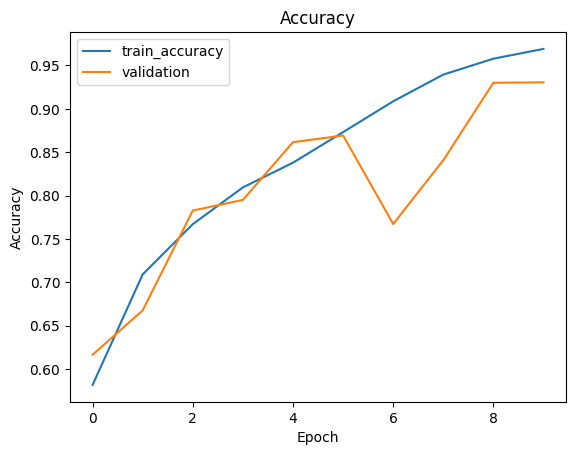

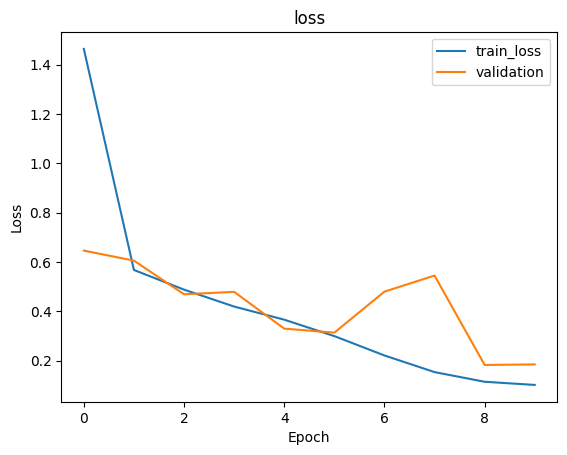

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()